### Введение

В эпоху цифровых технологий и социальных сетей кинематограф продолжает играть важную роль в культуре и развлечениях по всему миру. Фильмы не просто средство развлечения; они отражают социальные настроения, исторические моменты и эволюцию культурных трендов.

С появлением новых платформ для просмотра и широким доступом к информации о фильмах, анализ данных кинематографа становится все более актуальным и востребованным направлением исследований.


##### Цели проекта:

Основной целью данного проекта является анализ данных о фильмах с целью выявления трендов, предпочтений аудитории и факторов, влияющих на успех кинопроизведений. Планируется исследовать рейтинги, популярность и другие аспекты, связанные с фильмами.

Кроме того, проект направлен на анализ взаимосвязи между популярностью фильмов в интернете и их успешностью в прокате, а также изучение изменения интереса к различным жанрам и тематикам фильмов во времени.


##### Источники данных:

Для реализации проекта будут использованы следующие основные источники данных:

**IMDb (Internet Movie Database):** датасеты с IMDb, включающие в себя большую информацию о фильмах, такую как названия, жанры, год выпуска и другое. Мы возьмем акцент на 2 из них:

- **title.basics.tsv.gz** - Датасет с информацией о фильме, такой как название, количество минут, год выпуска и так далее.

- **title.ratings.tsv.gz** - Датасет с информацией о рейтингах. В нем нет другой информации, поэтому придется их сливать вместе.

**API Reddit** Данные о количестве и популярности постов обеспечит более детальное понимании о популярности фильма

Проект предполагает комплексный подход к анализу данных для получения всестороннего понимания динамики кинематографической индустрии и ее влияния на общественные предпочтения и тренды.

### Настройка рабочей среды

Перед тем как приступить к анализу данных, необходимо подготовить рабочую среду, установив необходимые библиотеки и настроив параметры отображения для обеспечения удобства работы и читаемости результатов. В этом разделе будут представлены основные шаги настройки рабочей среды для проекта анализа данных фильмов.


##### Импорт библиотек

Для начала работы нам потребуются следующие библиотеки Python, которые предоставляют широкие возможности для обработки и анализа данных, а также для визуализации результатов:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

- `pandas` и `numpy` будут использоваться для обработки и анализа данных.
- `matplotlib` и `seaborn` предназначены для создания визуализаций.
- `scipy` может понадобиться для проведения статистических тестов.

##### Настройка параметров отображения

Чтобы облегчить визуальный анализ данных и улучшить читаемость вывода, нужно настроить параметры отображения. Это можно сделать с помощью следующего кода:


In [ ]:
# Установка параметров для pandas
pd.set_option('display.max_columns', None)  # Показывать все столбцы DataFrame
pd.set_option('display.max_rows', 50)       # Установить максимальное количество строк для отображения
pd.set_option('display.float_format', '{:.2f}'.format)  # Форматирование вещественных чисел до двух знаков после запятой

# Настройка визуального стиля для seaborn
sns.set(style='whitegrid')  # Установка стиля графиков seaborn

Эти настройки помогут сделать данные более удобочитаемыми и упростят интерпретацию визуализаций, создаваемых в ходе анализа.

После выполнения этих шагов рабочая среда будет полностью готова к проведению аналитических исследований и анализу данных.

### Загрузка и первичная оценка данных
Прежде чем приступить к анализу данных о фильмах, необходимо их загрузить и провести первичную оценку. Для моего проекта я буду использовать данные из открытых источников, предоставляемых IMDb. Все представленные датасеты доступны для личного и некоммерческого использования, и их можно загрузить с официального сайта по адресу https://developer.imdb.com/non-commercial-datasets/.

Эти датасеты обновляются ежедневно и содержат обширную информацию о кинопроизведениях, включая названия, типы, ключевых участников проекта и многое другое.
Для начального анализа я выбрал датасет `title.basics.tsv.gz`, содержащий основную информацию о кинопроизведениях. Этот файл в формате TSV (Tab-Separated Values) сжат с использованием gzip и включает следующие поля:

- `tconst`: уникальный идентификатор названия.
- `titleType`: тип/формат названия (например, фильм, короткометражка, сериал, эпизод и т.д.).
- `primaryTitle`: основное название кинопроизведения.
- `originalTitle`: оригинальное название.
- `isAdult`: указатель на взрослый контент.
- `startYear`: год выпуска.
- `endYear`: год окончания показа для сериалов.
- `runtimeMinutes`: продолжительность в минутах.
- `genres`: жанры кинопроизведения.

Код для первычных значений:

In [ ]:
# Загрузка датасета (предварительно файл должен быть загружен распакован и загружен локально)
file_path = 'title.basics.tsv'  # Указать путь к файлу
df_long = pd.read_csv(file_path, sep='\t', low_memory=False)

# Предварительный просмотр данных
print(f'Количество записей: {df_long.shape[0]}')
print(df_long.head())

Количество записей: 3068256
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  


После загрузки и первичного просмотра данных из датасета `title.basics.tsv.gz`, мы получаем следующую информацию:

| tconst    | titleType | primaryTitle           | originalTitle          | isAdult | startYear | endYear | runtimeMinutes | genres                     |
|-----------|-----------|------------------------|------------------------|---------|-----------|---------|----------------|----------------------------|
| tt0000001 | short     | Carmencita             | Carmencita             | 0       | 1894      | \N      | 1              | Documentary,Short         |
| tt0000002 | short     | Le clown et ses chiens | Le clown et ses chiens | 0       | 1892      | \N      | 5              | Animation,Short           |
| tt0000003 | short     | Pauvre Pierrot         | Pauvre Pierrot         | 0       | 1892      | \N      | 4              | Animation,Comedy,Romance  |
| tt0000004 | short     | Un bon bock            | Un bon bock            | 0       | 1892      | \N      | 12             | Animation,Short           |
| tt0000005 | short     | Blacksmith Scene       | Blacksmith Scene       | 0       | 1893      | \N      | 1              | Comedy,Short              |


В рамках данного проекта такое количество записей не требуется.

Также ввиду дальнейших вычислений искать доп информацию для 400000 записей будет ресурсоемко, поэтому я ограничусь **только первыми 5000 фильмов 2015-2020** года выпуска

In [ ]:
unique_title_types = df_long['titleType'].unique()

# Вывод уникальных значений
print(unique_title_types)

['short' 'movie' 'tvShort' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']


In [ ]:
df = df_long.loc[(df_long['titleType'] == 'movie') & (df_long['startYear'].apply(lambda x: x.isdigit() and int(x) >= 2015 and int(x) <= 2020))].head(5000)

In [ ]:
print(f'Количество записей: {df.shape[0]}')
df.tail()

Количество записей: 5000


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
1271152,tt10505158,movie,Zu Zweit Allein,Zu Zweit Allein,0,2019,\N,82,"Comedy,Drama"
1271217,tt10505278,movie,MOMOL Nights,MOMOL Nights,0,2019,\N,86,"Comedy,Romance"
1271290,tt10505414,movie,Life in Four Elements,Life in Four Elements,0,2017,\N,\N,\N
1271294,tt10505420,movie,¿Que Puede Pasar?,¿Que Puede Pasar?,0,2018,\N,\N,Drama
1271295,tt10505422,movie,La mujer de los siete nombres,La mujer de los siete nombres,0,2018,\N,71,\N


### Предобработка данных

Для получения более полной картины и глубокого анализа кинематографической индустрии, важно дополнить данные информацией из различных внешних источников.

Это позволит нам не только анализировать фильмы с точки зрения их основных характеристик, но и оценить их популярность, общественный резонанс.
Для этого мы обратимся к двум популярным сервисам: IMDb и Reddit.

**Важно понимать, что данный датасет не предоставляет информации об оценке, поэтому придется получать ее из другого**

#### Анализ данных с Reddit

Reddit, с его множеством подфорумов (сабреддитов), посвященных кинематографу, предоставляет возможность изучить общественное мнение, реакции и обсуждения, связанные с конкретными фильмами или кинематографической индустрией в целом.

С помощью Reddit API, используя библиотеку `praw`, мы можем извлекать посты, комментарии и оценки по специфическим ключевым словам, названиям фильмов или сабреддитам. Это позволит нам анализировать настроения аудитории, популярность и вовлеченность в контексте обсуждения кинопроизведений.


In [ ]:
!pip install praw tqdm

Далее нужно зарегистрировать свое приложение на reddit, я это сделаю с помощью временной почты.

In [ ]:
import praw
import time
from tqdm import tqdm
import logging

logging.getLogger('praw').setLevel(logging.ERROR)

# Инициализация клиента Reddit
reddit = praw.Reddit(client_id='SQ-DMimf7MPLZlraZK7pCA',
                     client_secret='xqAGgit6oWoujP62RZ2sklhD0ehzZA',
                     user_agent='MovieChecker by xidoba9459@glaslack.com')

def get_reddit_posts_count(keyword, subreddit='all', time_filter='year'):
    """
    Возвращает количество постов на Reddit по заданному запросу.

    :param keyword: Ключевое слово для поиска, например, название фильма.
    :param subreddit: Сабреддит для поиска, по умолчанию 'all'.
    :param time_filter: Временной фильтр для поиска, по умолчанию 'year'.
    :return: Количество найденных постов.
    """
    try:
        search_results = reddit.subreddit(subreddit).search(keyword, time_filter=time_filter)
        count = len(list(search_results))
        return count
    except Exception as e:
        print(f"Ошибка при получении данных для {keyword}: {e}")
        return 0

def add_reddit_column(dataframe, title_column):
    """
    Добавляет колонку с данными из Reddit в DataFrame.

    :param dataframe: Исходный DataFrame.
    :param title_column: Название колонки DataFrame, содержащей ключевые слова для поиска.
    """
    tqdm.pandas(desc="Обработка Reddit Posts")
    dataframe['RedditPostsCount'] = dataframe[title_column].progress_apply(get_reddit_posts_count)


##### Время ожидания
Перед запуском интеграций важно учитывать, что процесс сбора данных может занять значительное время. Это связано с несколькими факторами:

- Ограничения на количество запросов от IMDb и Reddit могут потребовать введения задержек между запросами для избежания блокировок.
- Обработка и анализ большого объема данных требуют времени, особенно при выполнении сложных запросов и агрегации результатов.
- Количество запросов достаточно велико, что дополнительно увеличит общее время обработки.

In [ ]:
add_reddit_column(df, 'primaryTitle')
df.head()

Обработка Reddit Posts: 100%|██████████| 5000/5000 [1:59:02<00:00,  1.43s/it]


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,RedditPostsCount
11781,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime",100
62218,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,\N,70,Drama,100
68912,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,100
99958,tt0100275,movie,The Wandering Soap Opera,La Telenovela Errante,0,2017,\N,80,"Comedy,Drama,Fantasy",100
111001,tt0111414,movie,A Thin Life,A Thin Life,0,2018,\N,75,Comedy,100


Нам показало, что количество постов для всех этих фильмов ровно 100, давайте проверим, что это не просто фиксированное число:

In [ ]:
unique_values_types = df['RedditPostsCount'].unique()
unique_values_types

array([100,  37,   2,   5,   0,   1,  34,  47,  85,  18,  99,  61,   4,
        11,  66,  33,   3,   9,  14,  72,  40,   8,  22,   7,  80,  19,
        10,  17,  21,  38,  54,  16,  43,  20,  24,  48,  25,  28,  58,
        36,  29,  71,   6,  12,  84,  26,  49,  23,  70,  30,  51,  55,
        13,  42,  52,  65,  64,  31,  50,  46,  74,  76,  75,  15,  32,
        78,  82,  69,  94,  90,  89,  98,  35,  27,  56,  93,  41,  62,
        83,  39,  68,  44,  45,  96,  91,  59,  97,  57,  95,  79,  60])

Чтобы не потерять результат после перезагрузки файла, сохраню его в excel формате, чтобы, если что, загрузить его снова.

In [ ]:
# Сохранение
df.to_excel("df_2015_2020_5000_with_reddit.xlsx")

In [ ]:
# Загрузка
# df = pd.read_excel("df_2015_2020_5000_with_reddit.xlsx", sheet_name=0)

#### Дополнение датасета

Довольно проблематично, что в нем не присутсвует оценка и количество человек, оценивших фильм, поэтому нужно добавить это искуственно

Нам поможет датасет `title.ratings.tsv.gz` согласно описанию на сайте поля выглядят следующим образом:

- `tconst (строка)` — буквенно-цифровой уникальный идентификатор заголовка
- `AverageRating` – средневзвешенное значение всех индивидуальных оценок пользователей.
- `numVotes` — количество голосов, полученных за заголовок.

In [ ]:
rate_path = 'title.ratings.tsv'  # Указать путь к файлу
df_rate = pd.read_csv(rate_path, sep='\t', low_memory=False)

# Предварительный просмотр данных
print(f'Количество записей: {df_long.shape[0]}')
print(df_rate.head())

Количество записей: 3068256
      tconst  averageRating  numVotes
0  tt0000001           5.70      2037
1  tt0000002           5.70       272
2  tt0000003           6.50      1988
3  tt0000004           5.40       178
4  tt0000005           6.20      2746


Теперь перейдем к расширению нашего базого датафрейма `df`

In [ ]:
# Слияние df и df_rate по ключу 'tconst'
df_merged = pd.merge(df, df_rate, on='tconst', how='left')

# После этого df_merged будет содержать все поля из df и добавленные поля AverageRating и numVotes из df_rate.
# Если какие-то записи в df не имеют соответствующих записей в df_rate, в полях AverageRating и numVotes будет значение NaN.

# Проверка результата слияния
print(df_merged.shape[0])
df_merged.head()

5000


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,RedditPostsCount,averageRating,numVotes
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime",100,NaN,NaN
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,\N,70,Drama,100,6.40,186.00
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,100,6.70,8014.00
3,tt0100275,movie,The Wandering Soap Opera,La Telenovela Errante,0,2017,\N,80,"Comedy,Drama,Fantasy",100,6.50,359.00
4,tt0111414,movie,A Thin Life,A Thin Life,0,2018,\N,75,Comedy,100,NaN,NaN


Полученный результат не помешало бы сохранить

In [ ]:
# Сохранение
df_merged.to_excel("df_2015_2020_5000_with_reddit_imdb.xlsx")

In [ ]:
# Загрузка
# df = pd.read_excel("df_2015_2020_5000_with_reddit_imdb.xlsx", sheet_name=0)

После просмотра оказалось, что некоторые фильмы не имеют оценок, после проверки я понял, что на самом деле некоторым фильмам не хватает просмотров, для формирования оценки IMDb.

### Разведочный анализ данных (EDA)
Давайте начнем с загрузки и первичного осмотра данных:

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tconst            5000 non-null   object 
 1   titleType         5000 non-null   object 
 2   primaryTitle      5000 non-null   object 
 3   originalTitle     5000 non-null   object 
 4   isAdult           5000 non-null   object 
 5   startYear         5000 non-null   object 
 6   endYear           5000 non-null   object 
 7   runtimeMinutes    5000 non-null   object 
 8   genres            5000 non-null   object 
 9   RedditPostsCount  5000 non-null   int64  
 10  averageRating     2401 non-null   float64
 11  numVotes          2401 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 636.9+ KB


Теперь, когда мы имеем общее представление о структуре данных, можно перейти к их анализу. Начнём с рассчёта основных статистических метрик для числовых столбцов, а затем перейдём к визуализации данных.

Статистический анализ будет включать расчёт среднего значения, медианы, моды и стандартного отклонения для колонок startYear, RedditPostsCount, averageRating и numVotes, поскольку они могут дать представление о распределении значений.

In [ ]:
# Преобразование в числовой формат, обработка \N как NaN
df_merged['startYear'] = pd.to_numeric(df_merged['startYear'], errors='coerce')
df_merged['runtimeMinutes'] = pd.to_numeric(df_merged['runtimeMinutes'], errors='coerce')
df_merged['numVotes'] = pd.to_numeric(df_merged['numVotes'], errors='coerce')

# Рассчёт основных статистических метрик для интересующих нас столбцов
statistics = df_merged[['startYear', 'RedditPostsCount', 'averageRating', 'numVotes', 'runtimeMinutes']].describe()

# Для моды, поскольку describe() не включает её, рассчитаем отдельно
modes = df_merged[['startYear', 'RedditPostsCount', 'averageRating', 'numVotes', 'runtimeMinutes']].mode().iloc[0]

statistics.loc['mode'] = modes
statistics

,startYear,RedditPostsCount,averageRating,numVotes,runtimeMinutes
count,5000.00,5000.00,2401.00,2401.00,3583.00
mean,2018.52,79.69,6.21,3304.52,91.15
std,1.17,38.19,1.45,30924.19,30.43
min,2015.00,0.00,1.20,5.00,3.00
25%,2018.00,100.00,5.30,16.00,75.00
50%,2019.00,100.00,6.30,59.00,90.00
75%,2019.00,100.00,7.20,297.00,104.00
max,2020.00,100.00,10.00,719495.00,808.00
mode,2019.00,100.00,6.10,8.00,90.00


- **Год начала (startYear):** Данные охватывают фильмы, выпущенные с 2015 по 2020 год. Большинство записей относится к 2019 году (мода).
- **Количество постов на Reddit (RedditPostsCount):** Большинство записей имеют 100 постов на Reddit (мода и максимальное значение), что является порогом при сборе данных.
- **Средний рейтинг (averageRating):** Среднее значение около 6.21, с медианой в 6.3 и модой в 6.1, указывая на умеренно положительное распределение рейтингов.
- **Количество голосов (numVotes):** Среднее количество голосов значительно выше медианы из-за наличия нескольких фильмов с очень высоким числом голосов, что подтверждается высоким стандартным отклонением. Мода в 8 голосов указывает на наиболее частое минимальное количество голосов.
- **Продолжительность фильма (runtimeMinutes):** Средняя продолжительность фильмов составляет около 91 минуты, с модой и медианой около 90 минут, что является типичной длительностью для полнометражных фильмов.

Теперь перейдем к визуализации данных.

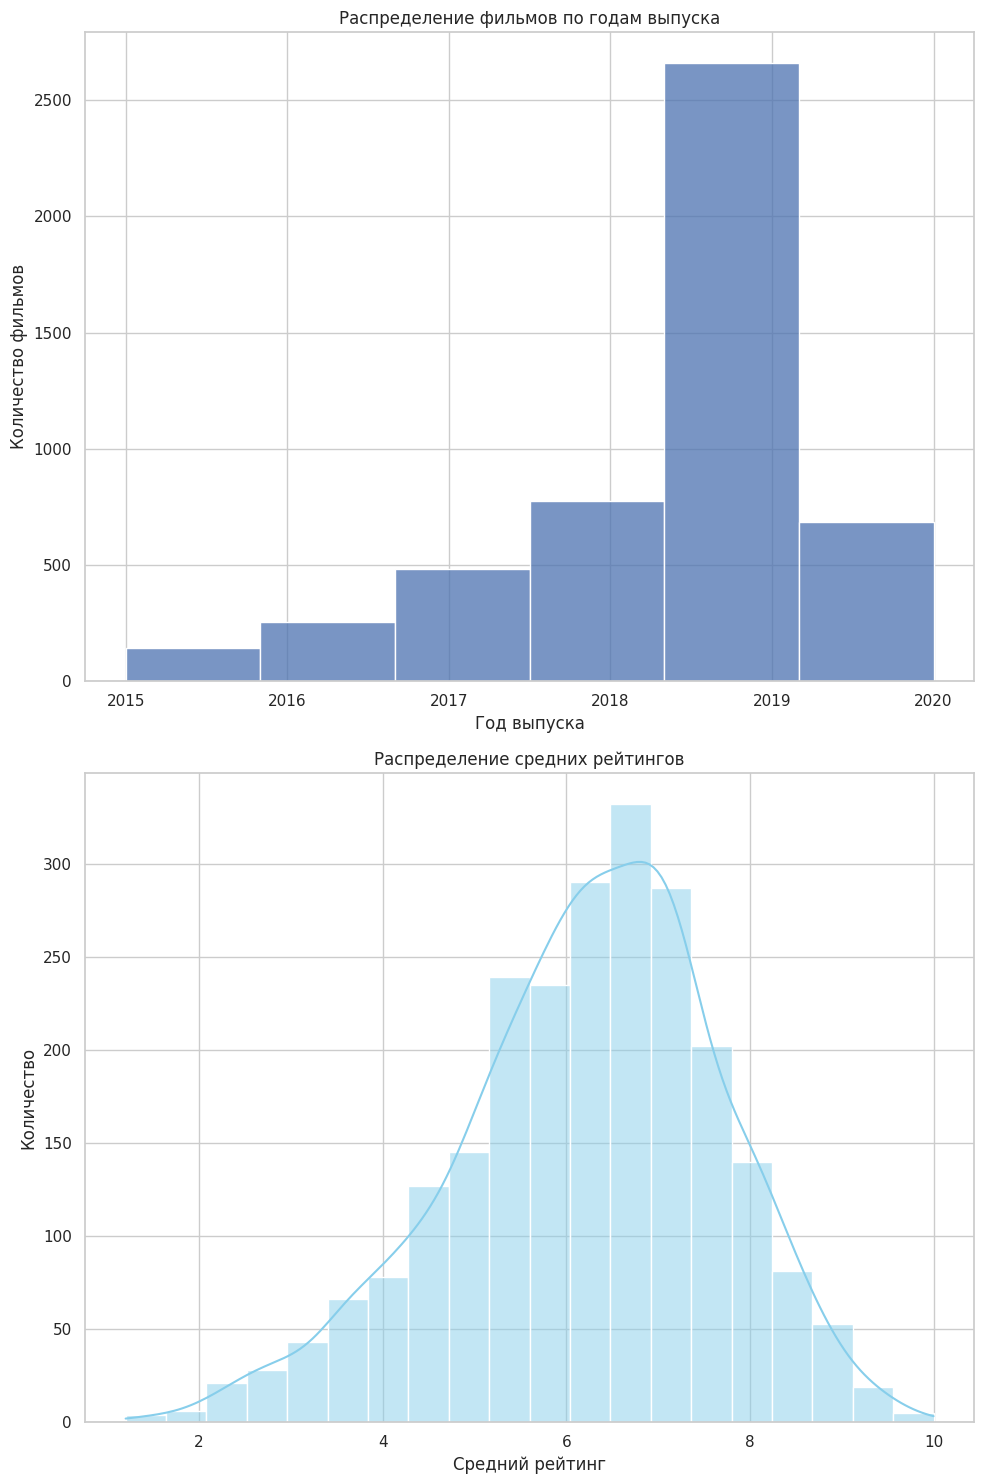

In [ ]:
# Создание фигуры для визуализации
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# Гистограмма годов выпуска фильмов
sns.histplot(df_merged['startYear'], bins=6, kde=False, ax=ax[0])
ax[0].set_title('Распределение фильмов по годам выпуска')
ax[0].set_xlabel('Год выпуска')
ax[0].set_ylabel('Количество фильмов')

# Гистограмма средних рейтингов
sns.histplot(df_merged['averageRating'], bins=20, kde=True, ax=ax[1], color='skyblue')
ax[1].set_title('Распределение средних рейтингов')
ax[1].set_xlabel('Средний рейтинг')
ax[1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

- **Распределение фильмов по годам выпуска:** В нашей выборке большая часть фильмов была выпущена в период с 2019 по 2020 годы. Это может кореллировать с реальным количеством всех фильмов, говоря о том, что в 2019 году вышло больше фильмов, чем в 2015-2016.

- **Распределение средних рейтингов:** Распределение средних рейтингов фильмов близко к нормальному, с небольшим смещением влево. Большинство фильмов имеют рейтинг в диапазоне от 5 до 7, что указывает на умеренно положительное восприятие фильмов аудиторией.

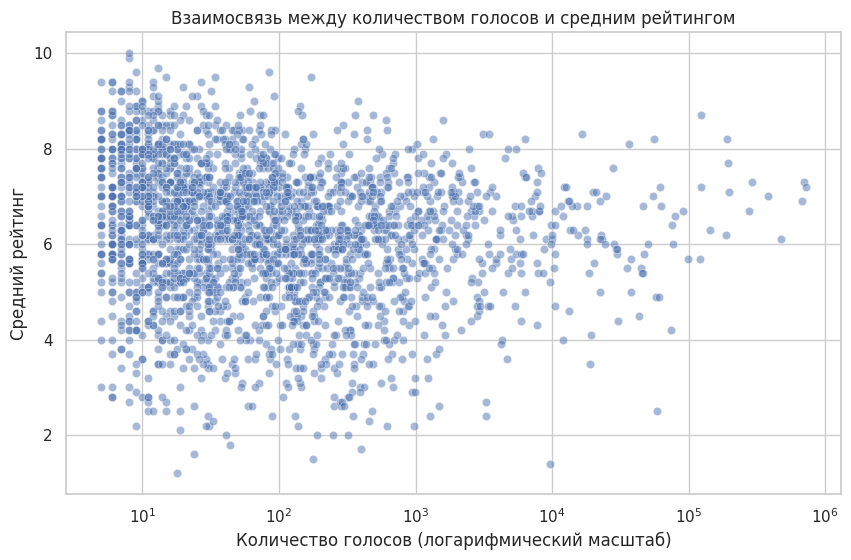

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numVotes', y='averageRating', data=df_merged, alpha=0.5)

plt.xscale('log')  # Применение логарифмического масштаба к оси X
plt.title('Взаимосвязь между количеством голосов и средним рейтингом')
plt.xlabel('Количество голосов (логарифмический масштаб)')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()


- Существует большое количество фильмов с относительно низким количеством голосов, и их средние рейтинги распределены довольно равномерно по всему диапазону рейтингов.
- Фильмы с большим количеством голосов, что указывает на их высокую популярность, часто имеют средний рейтинг в диапазоне от 6 до 8. Это может свидетельствовать о том, что более популярные фильмы, как правило, получают более высокие рейтинги, хотя есть исключения.
- Наблюдается некоторая концентрация данных вокруг средних значений рейтинга, что может указывать на наличие тенденции к более высоким рейтингам у фильмов с большим количеством голосов.

### Глубокий анализ

Для глубокого анализа данных проведем следующие исследования:

##### Сравнительный анализ фильмов и жанров
Сначала исследуем, как различные жанры фильмов влияют на их популярность и рейтинги. Для этого необходимо преобразовать колонку genres таким образом, чтобы можно было анализировать фильмы по каждому жанру отдельно. Затем сравним средние рейтинги и количество голосов по разным жанрам.

<ipython-input-70-ec6dbb7f9272>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genre_analysis = df_exploded_genres.groupby('genres_list')['averageRating', 'numVotes'].mean().reset_index()
<ipython-input-70-ec6dbb7f9272>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='averageRating', y='genres_list', data=genre_analysis_sorted_by_rating, palette='coolwarm')


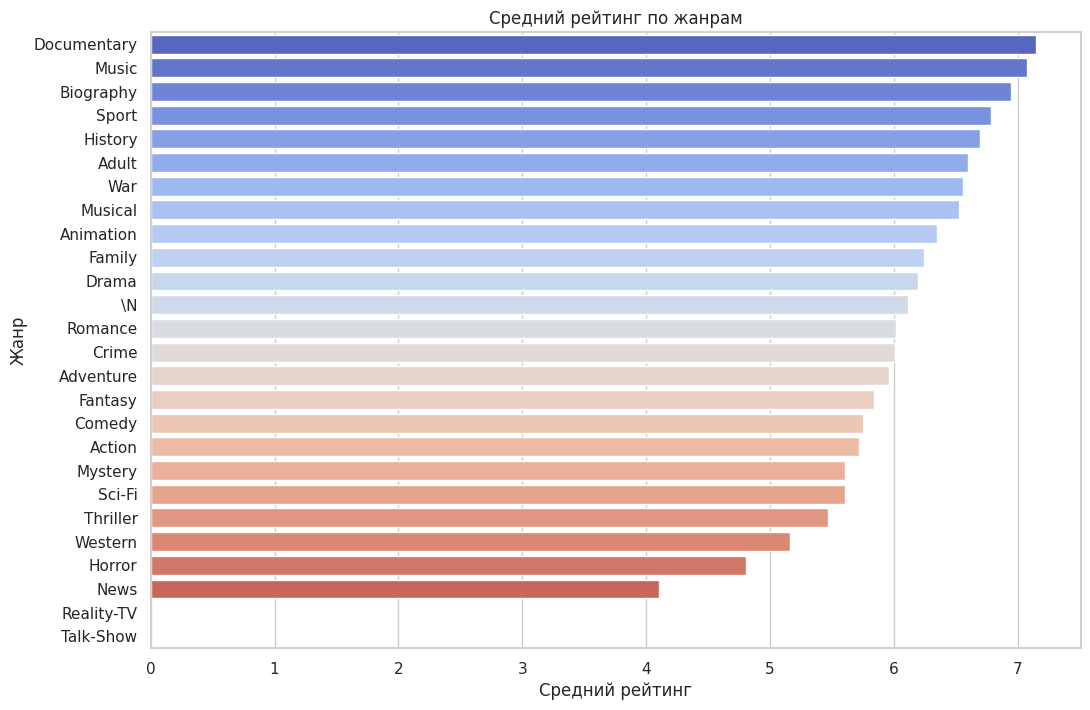

In [ ]:
# Преобразование строки жанров в список
df_merged['genres_list'] = df_merged['genres'].apply(lambda x: x.split(','))

# Разделение данных так, чтобы каждая строка содержала один жанр
df_exploded_genres = df_merged.explode('genres_list')

# Группировка данных по жанрам и расчет средних значений рейтингов и количества голосов
genre_analysis = df_exploded_genres.groupby('genres_list')['averageRating', 'numVotes'].mean().reset_index()

# Сортировка жанров по среднему рейтингу для визуализации
genre_analysis_sorted_by_rating = genre_analysis.sort_values(by='averageRating', ascending=False)

# Визуализация средних рейтингов по жанрам
plt.figure(figsize=(12, 8))
sns.barplot(x='averageRating', y='genres_list', data=genre_analysis_sorted_by_rating, palette='coolwarm')
plt.title('Средний рейтинг по жанрам')
plt.xlabel('Средний рейтинг')
plt.ylabel('Жанр')
plt.show()

На графике представлены средние рейтинги фильмов по различным жанрам. Из визуализации видно, что некоторые жанры имеют выше средний рейтинг по сравнению с другими. Это может указывать на то, что аудитория более благосклонно относится к фильмам определённых жанров.

#### Временной анализ интереса к фильмам
Теперь проведем временной анализ, чтобы изучить, как интерес к фильмам менялся со временем, основываясь на количестве постов на Reddit. Для этого сгруппируем данные по году выпуска и рассчитаем среднее количество постов на Reddit для каждого года. Это позволит нам увидеть тенденции в изменении популярности фильмов с течением времени.

Сделаем график сначала относительно reddit

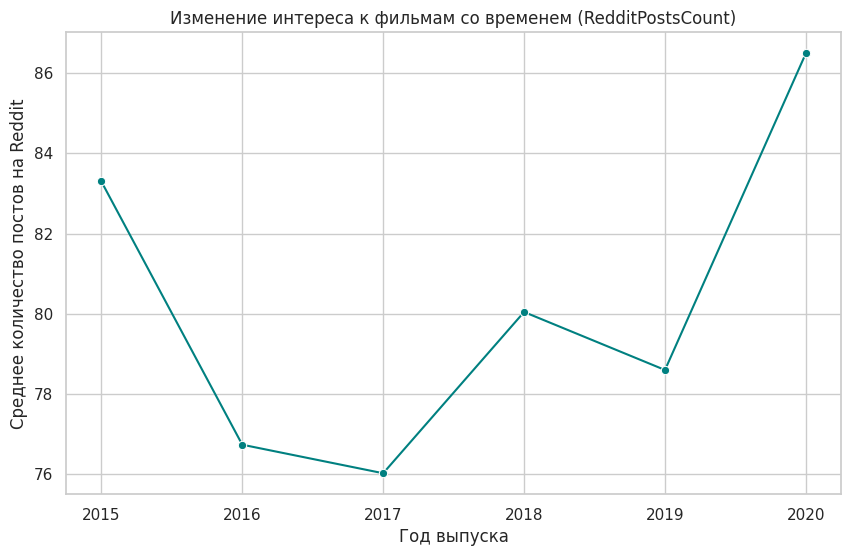

In [ ]:
# Группировка данных по году выпуска и расчет среднего количества постов на Reddit
yearly_reddit_posts = df_merged.groupby('startYear')['RedditPostsCount'].mean().reset_index()

# Визуализация изменений интереса к фильмам со временем на основе среднего количества постов на Reddit
plt.figure(figsize=(10, 6))
sns.lineplot(x='startYear', y='RedditPostsCount', data=yearly_reddit_posts, marker='o', color='teal')
plt.title('Изменение интереса к фильмам со временем (RedditPostsCount)')
plt.xlabel('Год выпуска')
plt.ylabel('Среднее количество постов на Reddit')
plt.grid(True)
plt.show()

А теперь относительно рейтингов

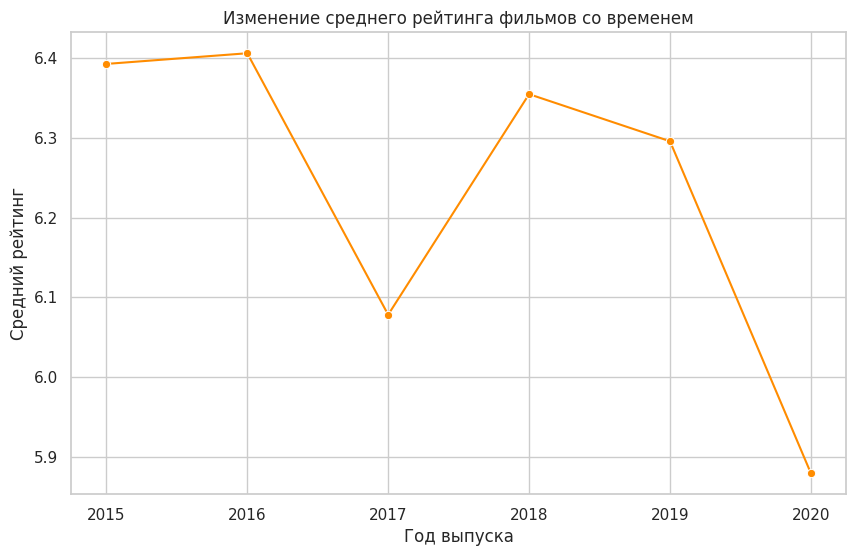

In [ ]:
# Группировка данных по году выпуска и расчет среднего рейтинга
yearly_average_rating = df_merged.groupby('startYear')['averageRating'].mean().reset_index()

# Визуализация изменений среднего рейтинга фильмов со временем
plt.figure(figsize=(10, 6))
sns.lineplot(x='startYear', y='averageRating', data=yearly_average_rating, marker='o', color='darkorange')
plt.title('Изменение среднего рейтинга фильмов со временем')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()

Можно заметить, что среднее количество постов и средний рейтинг имеют тенденцию к увеличению в определённые периоды, что может указывать на растущий интерес к фильмам или на увеличение активности пользователей на платформе Reddit в целом.

Однако в 2020 году популярность средняя увеличилась, но средние рейтинги упали

### Выводы

#### Результаты анализа

В ходе нашего анализа было проведено несколько ключевых исследований, направленных на понимание тенденций и предпочтений в сфере кинематографа на основе данных IMDb и активности на Reddit. Вот основные выводы:

- **Сравнительный анализ жанров** показал, что существуют заметные различия в средних рейтингах между разными жанрами фильмов. Некоторые жанры (например, документальные и исторические фильмы) имеют тенденцию получать более высокие рейтинги по сравнению с другими, что может свидетельствовать о более высоком качестве или предпочтениях определённой аудитории.

- **Временной анализ** выявил изменения в интересе к фильмам со временем, что отражается в количестве постов на Reddit и средних рейтингах. Среднее количество постов на Reddit показывает рост интереса к фильмам, выпущенным в последние годы исследования, в то время как средний рейтинг немного колеблется, что может указывать на изменения в качестве фильмов или восприятии аудиторией.

#### Ограничения исследования

Несмотря на обширность и разнообразие анализа, текущее исследование имеет ряд ограничений:

- **Выборка данных**: Анализ может не полностью отражать все аспекты кинематографической индустрии или предпочтения аудитории.

- **Неполные данные**: Некоторые поля данных, такие как средние рейтинги и количество голосов, содержали пропуски, что могло повлиять на точность анализа и общие выводы.

- **Субъективность рейтингов и постов**: Рейтинги IMDb и активность на Reddit могут быть субъективными и зависеть от множества факторов, включая кампании по продвижению и социально-культурные тенденции, что затрудняет объективную оценку качества фильмов.

#### Заключение

Несмотря на указанные ограничения, проведённый анализ предоставляет ценные инсайты о тенденциях и предпочтениях в мире кинематографа. Результаты могут быть полезны для кинокритиков, маркетологов и исследователей в области культуры и искусства.